# Komuter Dataset Exploration

This notebook explores the KTM Komuter ridership dataset for 2025.

## Objectives

1. Understand the structure and contents of the dataset
2. Check for missing values and outliers
3. Explore temporal patterns in ridership
4. Analyze station popularity and travel patterns
5. Identify key insights that could inform future modeling

## Setup and Data Loading

First, let's import the necessary libraries and load our dataset.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
sns.set_context("notebook", font_scale=1.2)

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
file_path = '../data/raw/komuter_2025.csv'
df = pd.read_csv(file_path)

# Check the first few rows of the data
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (670599, 5)


,date,time,origin,destination,ridership
0,2025-01-01,00:00,Abdullah Hukum,Klang,1
1,2025-01-01,00:00,Abdullah Hukum,Telok Pulai,1
2,2025-01-01,00:00,Bangi,Batu Caves,1
3,2025-01-01,00:00,Bank Negara,Sungai Gadut,1
4,2025-01-01,00:00,Batu Tiga,Kampung Raja Uda,1


## Basic Data Exploration

In [6]:
# Check data types and basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670599 entries, 0 to 670598
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         670599 non-null  object
 1   time         670599 non-null  object
 2   origin       670599 non-null  object
 3   destination  670599 non-null  object
 4   ridership    670599 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 25.6+ MB


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
date           0
time           0
origin         0
destination    0
ridership      0
dtype: int64


In [8]:
# Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ridership,670599.0,4.803986,11.137706,1.0,1.0,2.0,4.0,712.0


In [9]:
# Check unique values for categorical columns
print(f"Number of unique dates: {df['date'].nunique()}")
print(f"Number of unique times: {df['time'].nunique()}")
print(f"Number of unique origin stations: {df['origin'].nunique()}")
print(f"Number of unique destination stations: {df['destination'].nunique()}")

# Check for 'Unknown' values
print("\nOccurrences of 'Unknown' in origin:", (df['origin'] == 'Unknown').sum())
print("Occurrences of 'Unknown' in destination:", (df['destination'] == 'Unknown').sum())

Number of unique dates: 112
Number of unique times: 24
Number of unique origin stations: 58
Number of unique destination stations: 59

Occurrences of 'Unknown' in origin: 5252
Occurrences of 'Unknown' in destination: 1341


## Data Preprocessing

Let's convert date and time columns to proper datetime format for easier analysis.

In [10]:
# Convert date and time columns to datetime
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['date'] = pd.to_datetime(df['date'])

# Extract useful time components
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek
df['day_name'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

# Display the updated dataframe
df.head()

,date,time,origin,destination,ridership,datetime,year,month,day,day_of_week,day_name,hour
0,2025-01-01,00:00,Abdullah Hukum,Klang,1,2025-01-01,2025,1,1,2,Wednesday,0
1,2025-01-01,00:00,Abdullah Hukum,Telok Pulai,1,2025-01-01,2025,1,1,2,Wednesday,0
2,2025-01-01,00:00,Bangi,Batu Caves,1,2025-01-01,2025,1,1,2,Wednesday,0
3,2025-01-01,00:00,Bank Negara,Sungai Gadut,1,2025-01-01,2025,1,1,2,Wednesday,0
4,2025-01-01,00:00,Batu Tiga,Kampung Raja Uda,1,2025-01-01,2025,1,1,2,Wednesday,0


## Temporal Analysis

### Ridership by Hour of Day

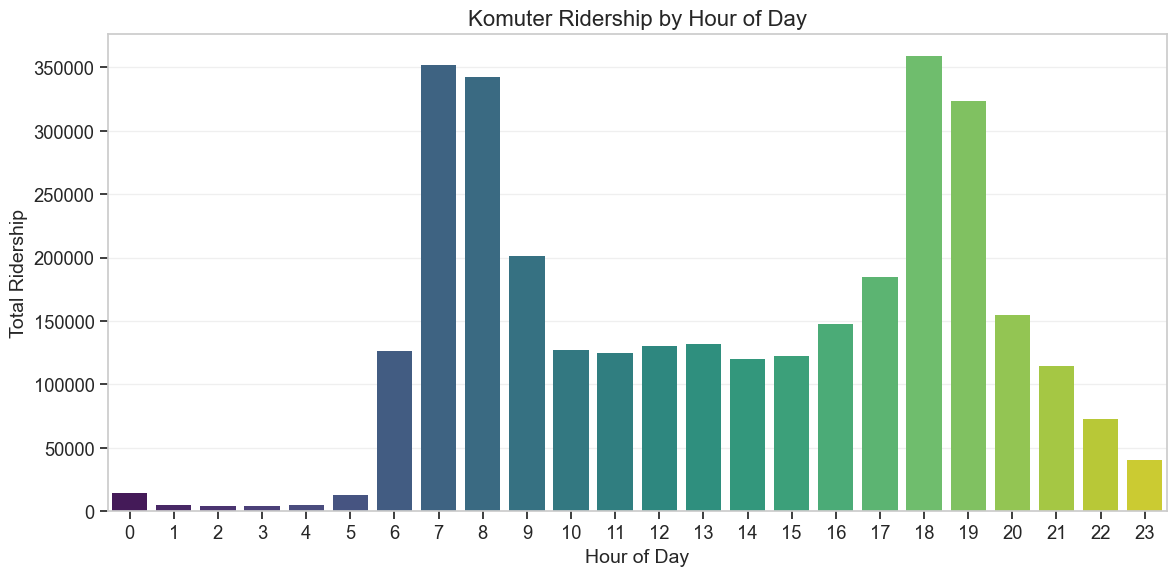

In [11]:
# Ridership by hour of day
hourly_ridership = df.groupby('hour')['ridership'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='ridership', data=hourly_ridership, palette='viridis')
plt.title('Komuter Ridership by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

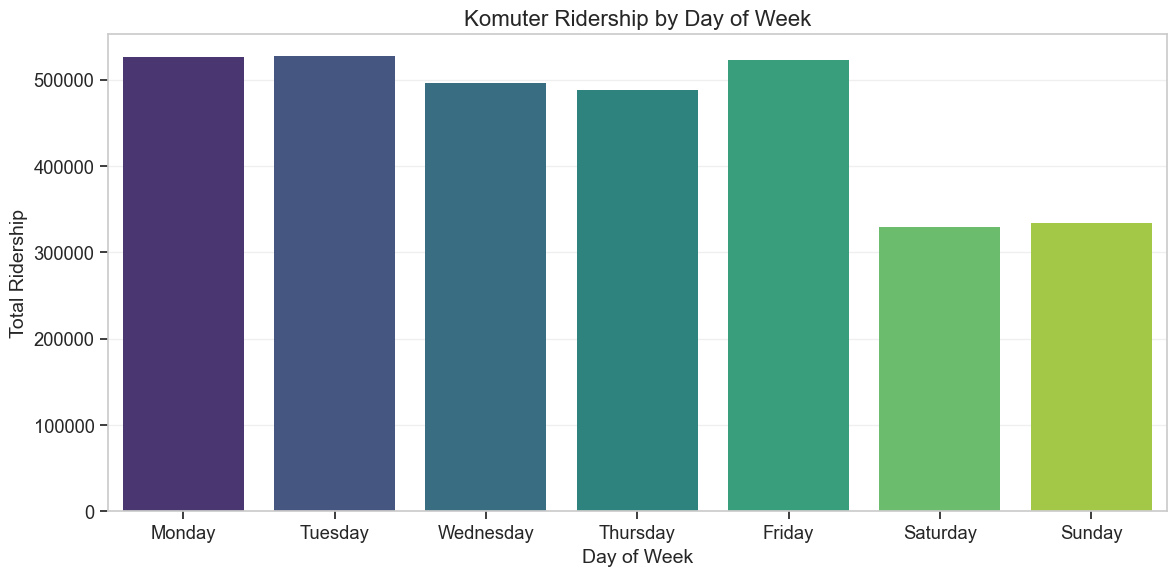

In [12]:
# Ridership by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_ridership = df.groupby('day_name')['ridership'].sum().reset_index()
daily_ridership['day_name'] = pd.Categorical(daily_ridership['day_name'], categories=day_order, ordered=True)
daily_ridership = daily_ridership.sort_values('day_name')

plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='ridership', data=daily_ridership, palette='viridis')
plt.title('Komuter Ridership by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

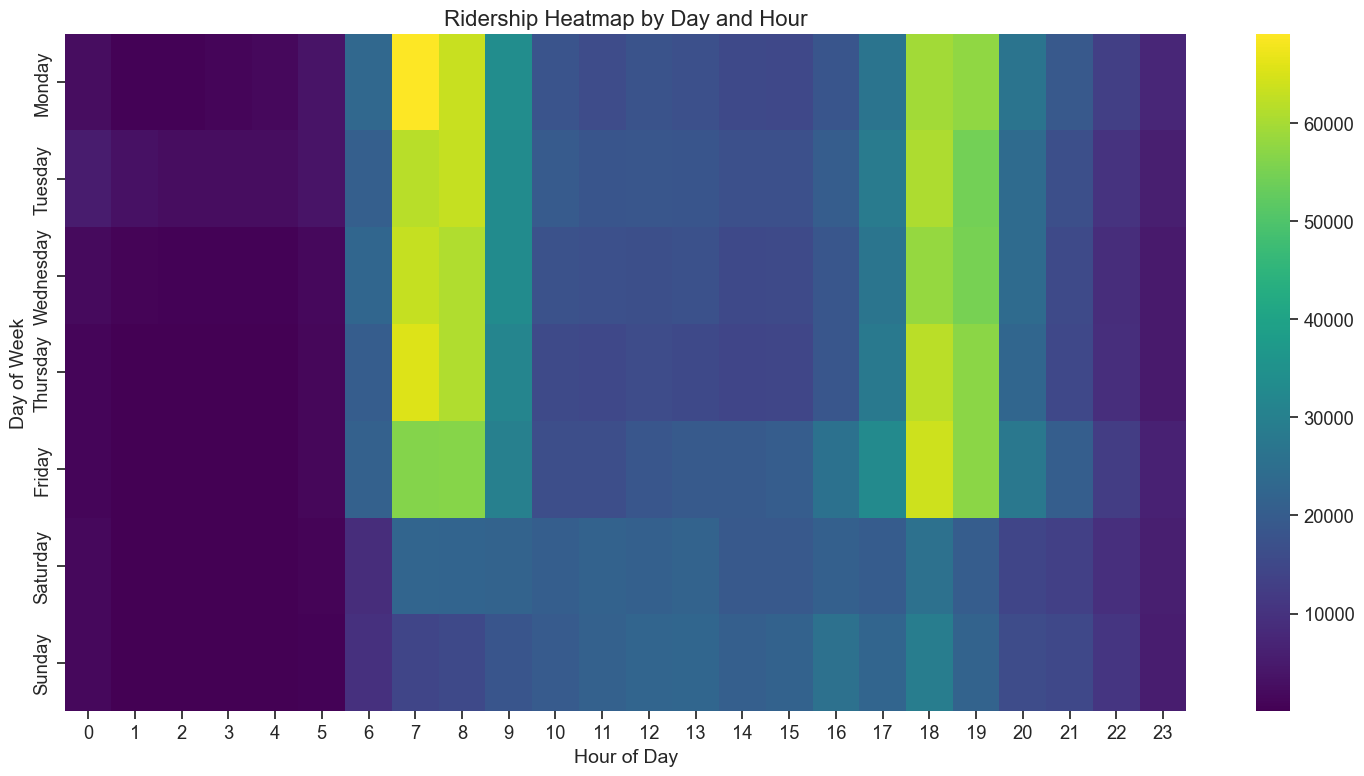

In [13]:
# Heatmap of ridership by day of week and hour
day_hour_ridership = df.groupby(['day_name', 'hour'])['ridership'].sum().reset_index()
day_hour_pivot = day_hour_ridership.pivot(index='day_name', columns='hour', values='ridership')
day_hour_pivot = day_hour_pivot.reindex(day_order)

plt.figure(figsize=(15, 8))
sns.heatmap(day_hour_pivot, cmap='viridis', annot=False, fmt=".0f")
plt.title('Ridership Heatmap by Day and Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Day of Week', fontsize=14)
plt.tight_layout()
plt.show()

## Station Analysis

### Top Origin and Destination Stations

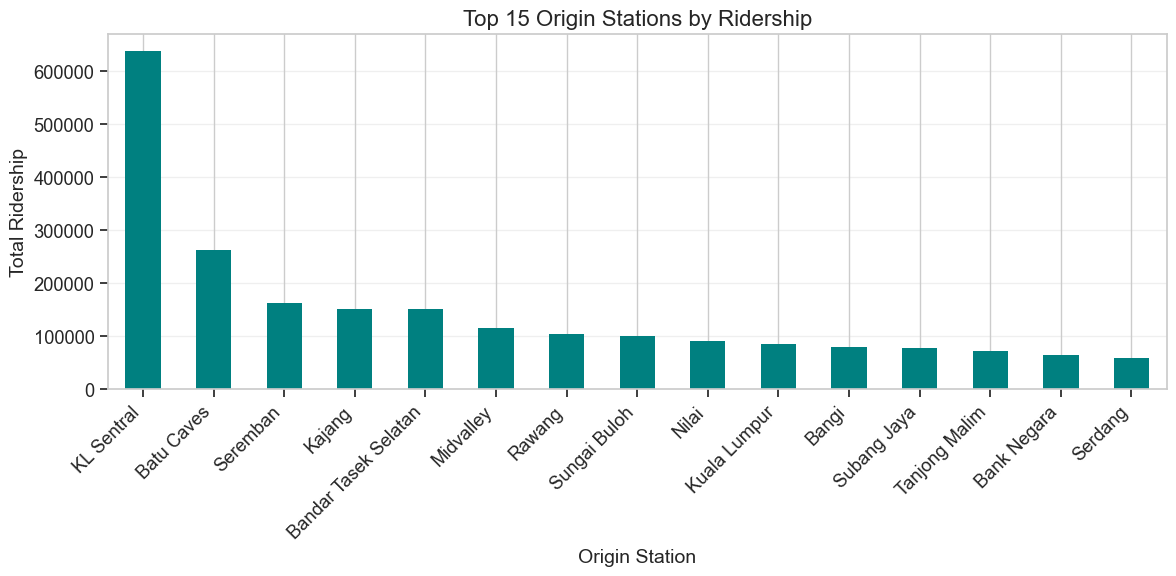

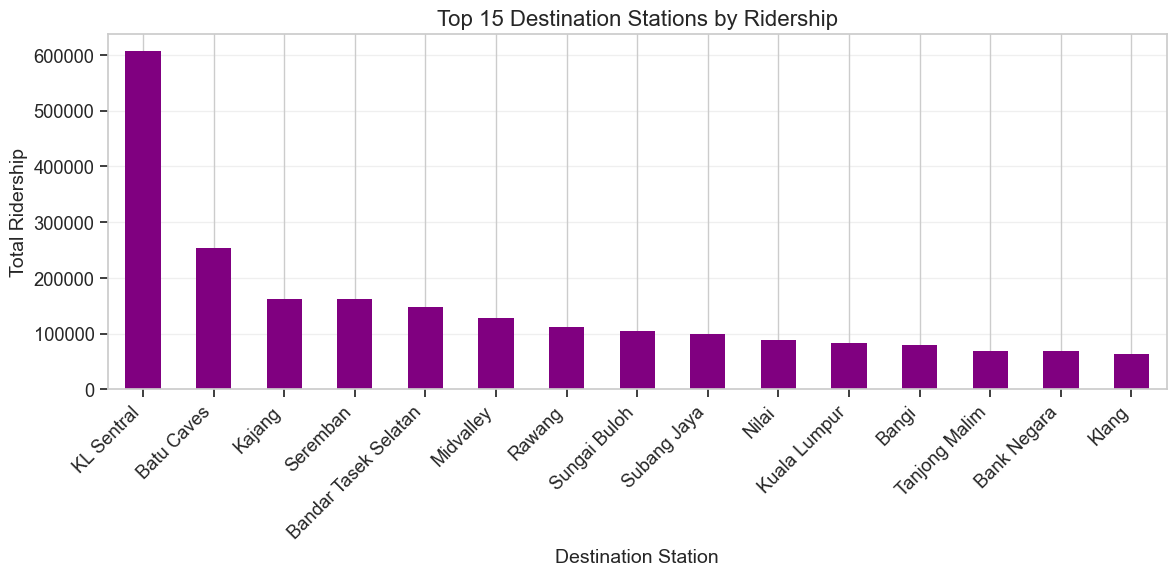

In [14]:
# Top 15 origin stations by ridership
top_origins = df.groupby('origin')['ridership'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
top_origins.plot(kind='bar', color='teal')
plt.title('Top 15 Origin Stations by Ridership', fontsize=16)
plt.xlabel('Origin Station', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Top 15 destination stations by ridership
top_destinations = df.groupby('destination')['ridership'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
top_destinations.plot(kind='bar', color='purple')
plt.title('Top 15 Destination Stations by Ridership', fontsize=16)
plt.xlabel('Destination Station', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

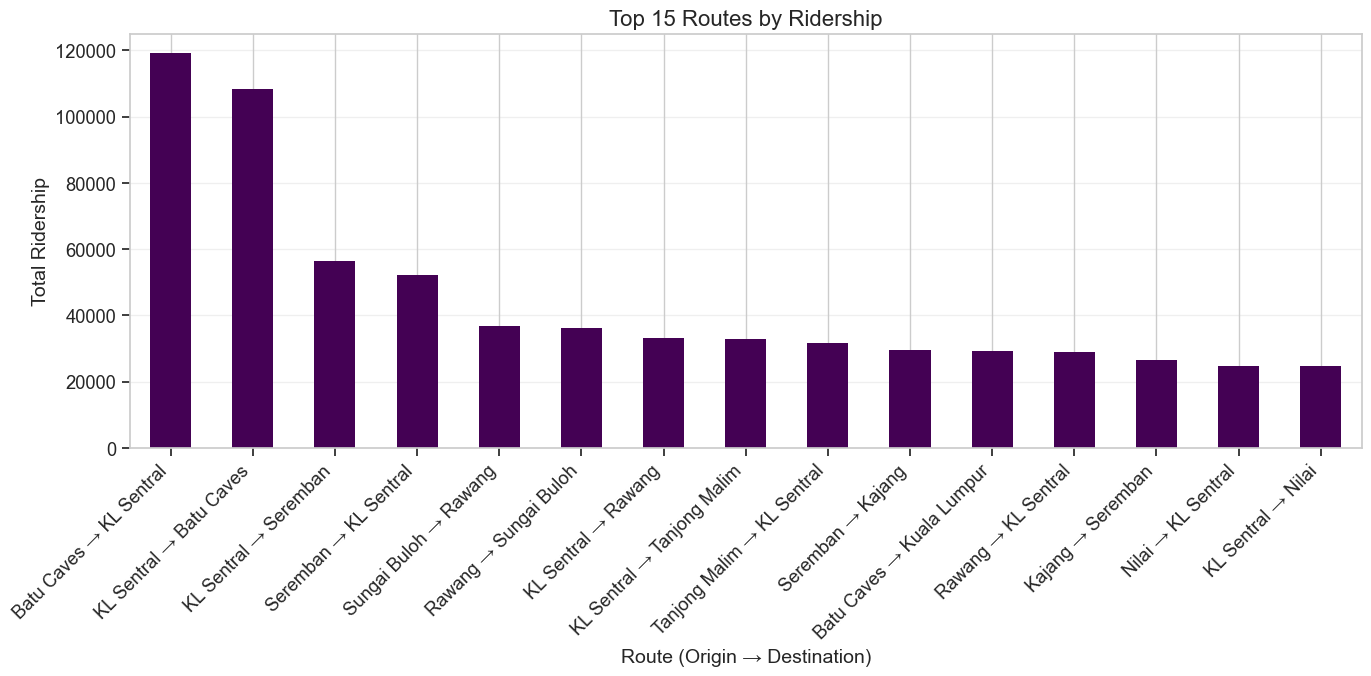

In [15]:
# Find top 15 routes (origin-destination pairs) by ridership
df['route'] = df['origin'] + ' → ' + df['destination']
top_routes = df.groupby('route')['ridership'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
top_routes.plot(kind='bar', colormap='viridis')
plt.title('Top 15 Routes by Ridership', fontsize=16)
plt.xlabel('Route (Origin → Destination)', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

## Station Network Analysis

Let's create an origin-destination matrix to understand the flow between stations.

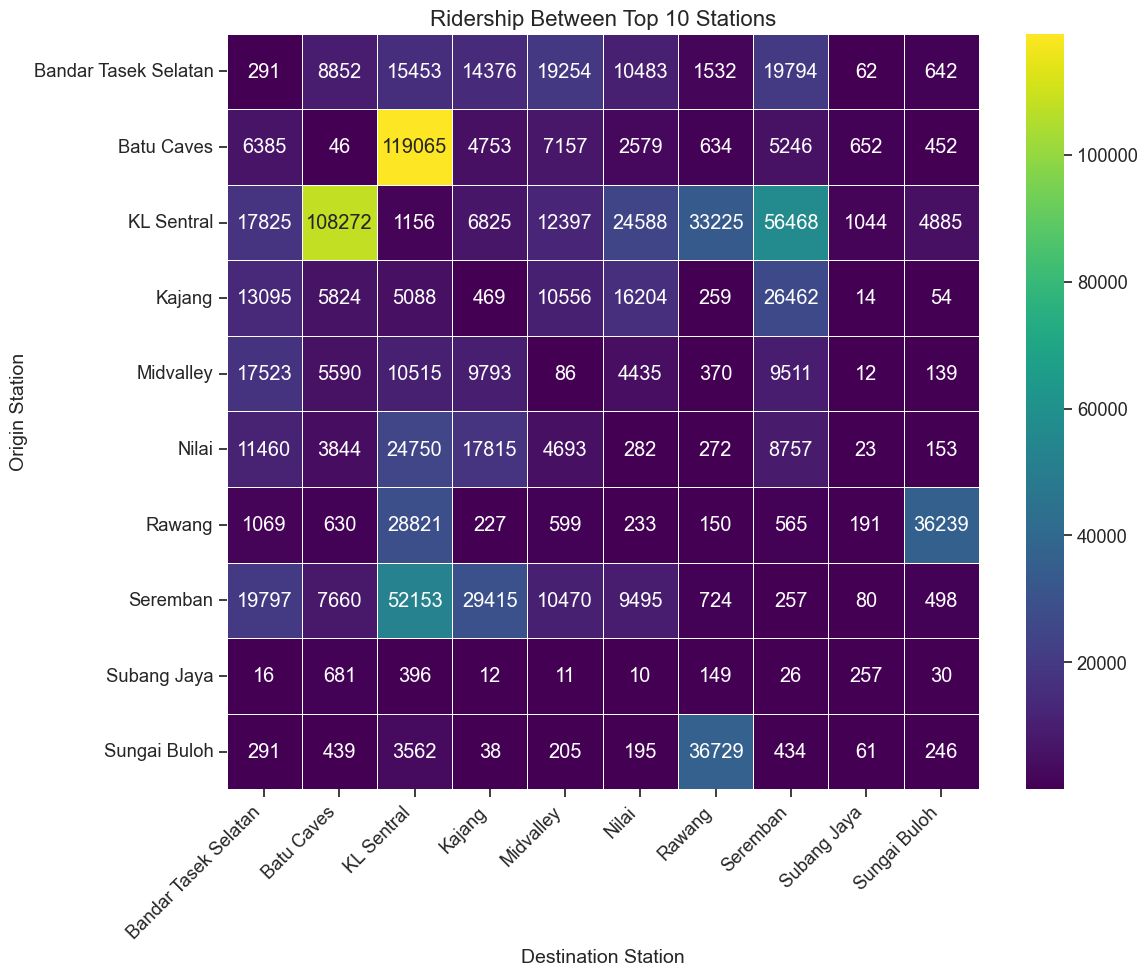

In [16]:
# Create an origin-destination matrix for the top stations
# Get top 10 stations based on total inbound and outbound ridership
origin_counts = df.groupby('origin')['ridership'].sum()
dest_counts = df.groupby('destination')['ridership'].sum()
station_total = origin_counts.add(dest_counts, fill_value=0).sort_values(ascending=False)
top_stations = station_total.head(10).index.tolist()

# Filter data for top stations only
top_stations_df = df[(df['origin'].isin(top_stations)) & (df['destination'].isin(top_stations))]

# Create the OD matrix
od_matrix = top_stations_df.pivot_table(
    index='origin', 
    columns='destination', 
    values='ridership', 
    aggfunc='sum', 
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(od_matrix, annot=True, cmap='viridis', fmt='.0f', linewidths=0.5)
plt.title('Ridership Between Top 10 Stations', fontsize=16)
plt.xlabel('Destination Station', fontsize=14)
plt.ylabel('Origin Station', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Peak Hour Analysis

Let's analyze ridership patterns during morning and evening peak hours.

<Figure size 1200x600 with 0 Axes>

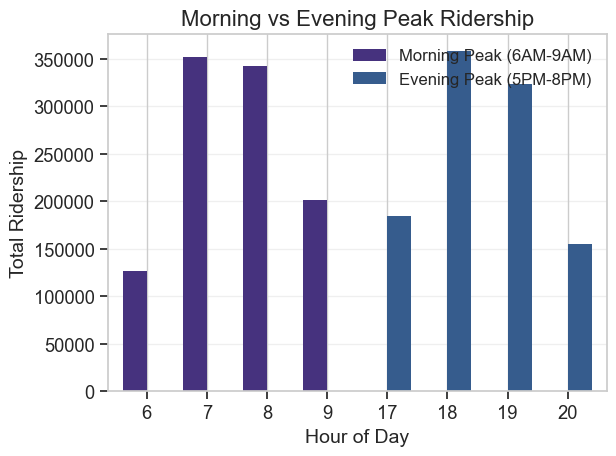

In [17]:
# Define peak hours
morning_peak = df[(df['hour'] >= 6) & (df['hour'] <= 9)]
evening_peak = df[(df['hour'] >= 17) & (df['hour'] <= 20)]

# Compare morning and evening peak ridership
peak_comparison = pd.DataFrame({
    'Morning Peak (6AM-9AM)': morning_peak.groupby('hour')['ridership'].sum(),
    'Evening Peak (5PM-8PM)': evening_peak.groupby('hour')['ridership'].sum()
})

plt.figure(figsize=(12, 6))
peak_comparison.plot(kind='bar', width=0.8)
plt.title('Morning vs Evening Peak Ridership', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

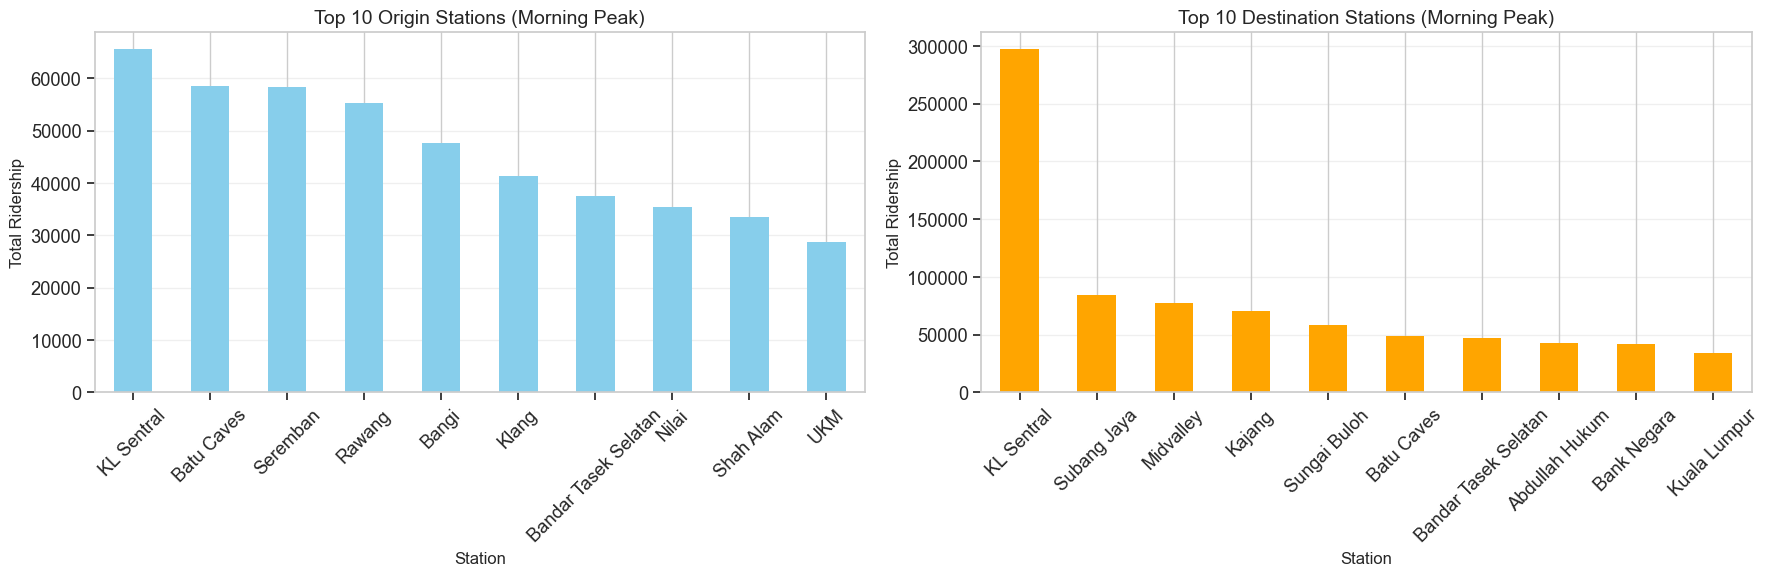

In [18]:
# Top 10 origin stations during morning peak
morning_origins = morning_peak.groupby('origin')['ridership'].sum().sort_values(ascending=False).head(10)

# Top 10 destination stations during morning peak
morning_destinations = morning_peak.groupby('destination')['ridership'].sum().sort_values(ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

morning_origins.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Origin Stations (Morning Peak)', fontsize=14)
axes[0].set_xlabel('Station', fontsize=12)
axes[0].set_ylabel('Total Ridership', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

morning_destinations.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Top 10 Destination Stations (Morning Peak)', fontsize=14)
axes[1].set_xlabel('Station', fontsize=12)
axes[1].set_ylabel('Total Ridership', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

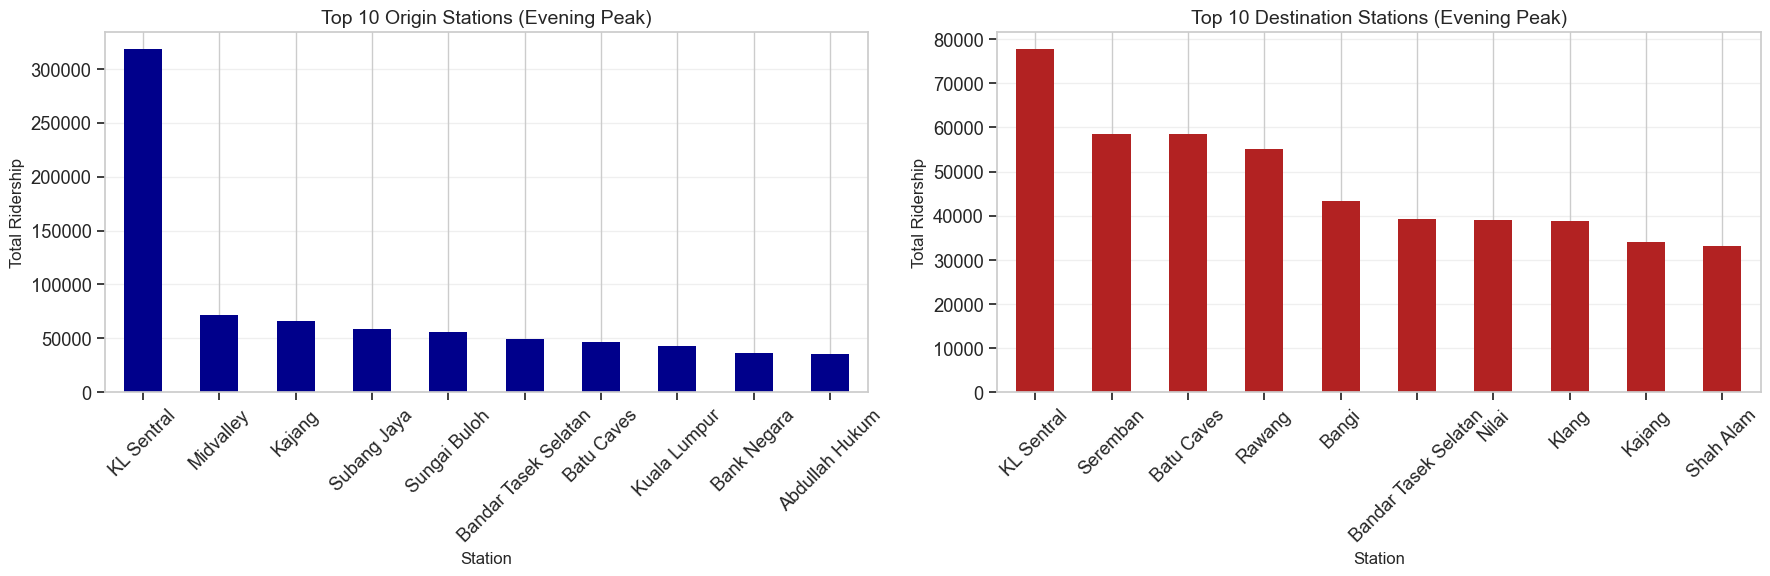

In [19]:
# Top 10 origin stations during evening peak
evening_origins = evening_peak.groupby('origin')['ridership'].sum().sort_values(ascending=False).head(10)

# Top 10 destination stations during evening peak
evening_destinations = evening_peak.groupby('destination')['ridership'].sum().sort_values(ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

evening_origins.plot(kind='bar', ax=axes[0], color='darkblue')
axes[0].set_title('Top 10 Origin Stations (Evening Peak)', fontsize=14)
axes[0].set_xlabel('Station', fontsize=12)
axes[0].set_ylabel('Total Ridership', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

evening_destinations.plot(kind='bar', ax=axes[1], color='firebrick')
axes[1].set_title('Top 10 Destination Stations (Evening Peak)', fontsize=14)
axes[1].set_xlabel('Station', fontsize=12)
axes[1].set_ylabel('Total Ridership', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Anomaly Detection 

Let's look for any unusual patterns or outliers in the ridership data.

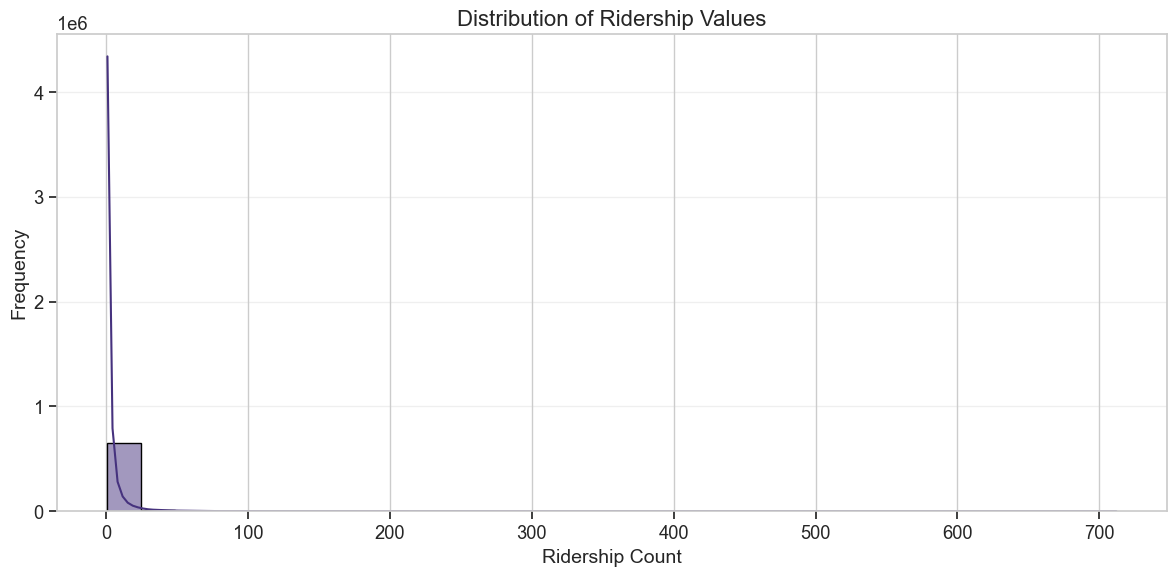

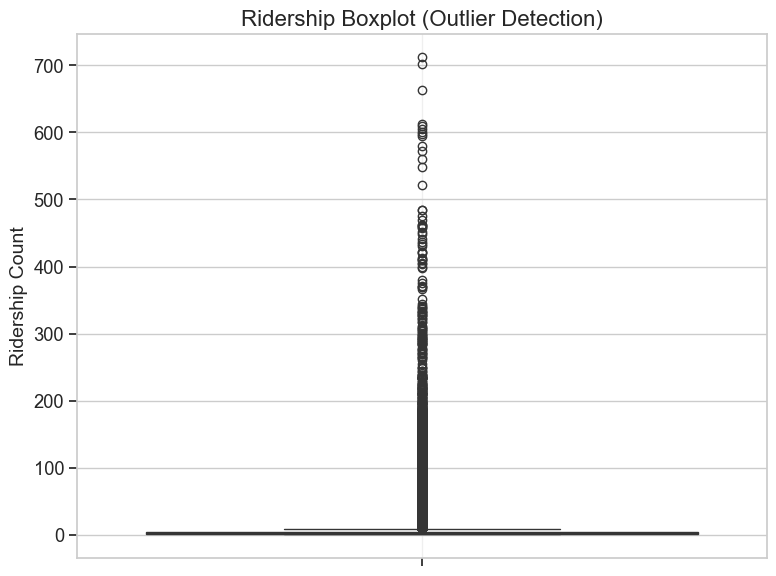

Top 10 highest ridership records:


,date,time,origin,destination,ridership
273696,2025-02-11,13:00,Batu Caves,KL Sentral,712
274636,2025-02-11,15:00,Batu Caves,KL Sentral,702
269723,2025-02-11,00:00,KL Sentral,Batu Caves,664
275139,2025-02-11,16:00,Batu Caves,KL Sentral,612
272790,2025-02-11,11:00,Batu Caves,KL Sentral,609
274166,2025-02-11,14:00,Batu Caves,KL Sentral,605
273258,2025-02-11,12:00,Batu Caves,KL Sentral,601
269199,2025-02-10,22:00,KL Sentral,Batu Caves,598
268808,2025-02-10,21:00,KL Sentral,Batu Caves,595
261369,2025-02-10,07:00,Batu Caves,KL Sentral,580


In [20]:
# Distribution of ridership values
plt.figure(figsize=(12, 6))
sns.histplot(df['ridership'], bins=30, kde=True)
plt.title('Distribution of Ridership Values', fontsize=16)
plt.xlabel('Ridership Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Check for outliers in ridership
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ridership'])
plt.title('Ridership Boxplot (Outlier Detection)', fontsize=16)
plt.ylabel('Ridership Count', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Investigate the top outliers
outliers = df.sort_values('ridership', ascending=False).head(10)
print("Top 10 highest ridership records:")
outliers[['date', 'time', 'origin', 'destination', 'ridership']]

## Data Completeness Check

Let's verify the completeness of our dataset to ensure we have data for all days and stations.

In [21]:
# Check date range coverage
min_date = df['date'].min()
max_date = df['date'].max()
date_range = (max_date - min_date).days + 1
unique_dates = df['date'].nunique()

print(f"Date range: {min_date} to {max_date}")
print(f"Expected number of days: {date_range}")
print(f"Actual number of unique days in data: {unique_dates}")

if date_range == unique_dates:
    print("✅ Data is complete for all dates in the range.")
else:
    print("❌ There are missing dates in the dataset.")
    # Find missing dates
    all_dates = pd.date_range(start=min_date, end=max_date)
    dates_in_df = pd.Series(df['date'].unique())
    missing_dates = pd.Series(d for d in all_dates if d not in dates_in_df)
    print(f"Missing dates: {missing_dates.tolist() if len(missing_dates) < 20 else str(len(missing_dates)) + ' dates missing'}")

Date range: 2025-01-01 00:00:00 to 2025-04-22 00:00:00
Expected number of days: 112
Actual number of unique days in data: 112
✅ Data is complete for all dates in the range.


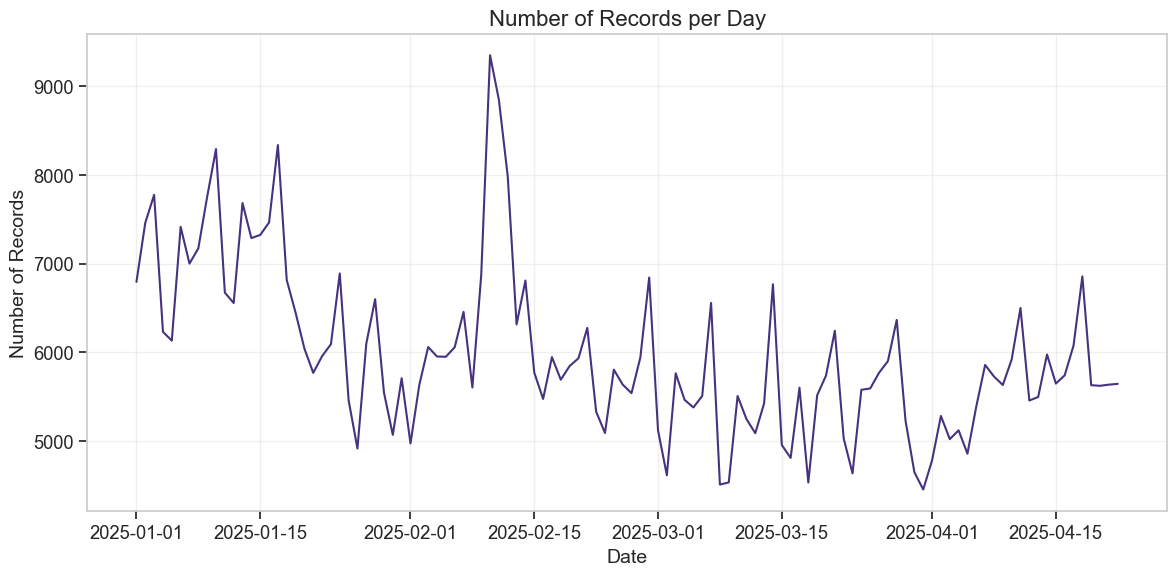

In [22]:
# Check for data consistency by date
daily_records = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(12, 6))
daily_records.plot(kind='line')
plt.title('Number of Records per Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Summary Statistics by Station

In [23]:
# Calculate summary statistics for each station
origin_stats = df.groupby('origin')['ridership'].agg(['count', 'sum', 'mean', 'median', 'std']).sort_values('sum', ascending=False)
origin_stats.columns = ['Number of Trips', 'Total Ridership', 'Average Ridership', 'Median Ridership', 'Std Dev']
origin_stats = origin_stats.round(2)

print("Top 15 Origin Stations by Total Ridership:")
origin_stats.head(15)

Top 15 Origin Stations by Total Ridership:


,Number of Trips,Total Ridership,Average Ridership,Median Ridership,Std Dev
origin,,,,,
KL Sentral,72452,638802,8.82,4.0,17.07
Batu Caves,24404,263392,10.79,3.0,28.95
Seremban,27395,162911,5.95,2.0,12.05
Kajang,26405,151298,5.73,3.0,9.31
Bandar Tasek Selatan,33716,151250,4.49,2.0,6.85
Midvalley,25649,114892,4.48,2.0,7.14
Rawang,19465,104884,5.39,2.0,13.89
Sungai Buloh,16846,100620,5.97,2.0,12.06
Nilai,20898,91710,4.39,2.0,7.28


In [24]:
# Calculate summary statistics for routes
route_stats = df.groupby('route')['ridership'].agg(['count', 'sum', 'mean', 'median', 'std']).sort_values('sum', ascending=False)
route_stats.columns = ['Number of Trips', 'Total Ridership', 'Average Ridership', 'Median Ridership', 'Std Dev']
route_stats = route_stats.round(2)

print("Top 15 Routes by Total Ridership:")
route_stats.head(15)

Top 15 Routes by Total Ridership:


,Number of Trips,Total Ridership,Average Ridership,Median Ridership,Std Dev
route,,,,,
Batu Caves → KL Sentral,1929,119065,61.72,45.0,73.01
KL Sentral → Batu Caves,2084,108272,51.95,37.0,57.87
KL Sentral → Seremban,2219,56468,25.45,17.0,26.95
Seremban → KL Sentral,2186,52153,23.86,16.0,25.45
Sungai Buloh → Rawang,1965,36729,18.69,10.0,26.87
Rawang → Sungai Buloh,1856,36239,19.53,9.0,32.48
KL Sentral → Rawang,1990,33225,16.70,9.0,22.72
KL Sentral → Tanjong Malim,2120,32932,15.53,11.0,14.97
Tanjong Malim → KL Sentral,2063,31527,15.28,11.0,13.71


## Correlation Analysis

Let's see if there are any correlations between different variables and ridership.

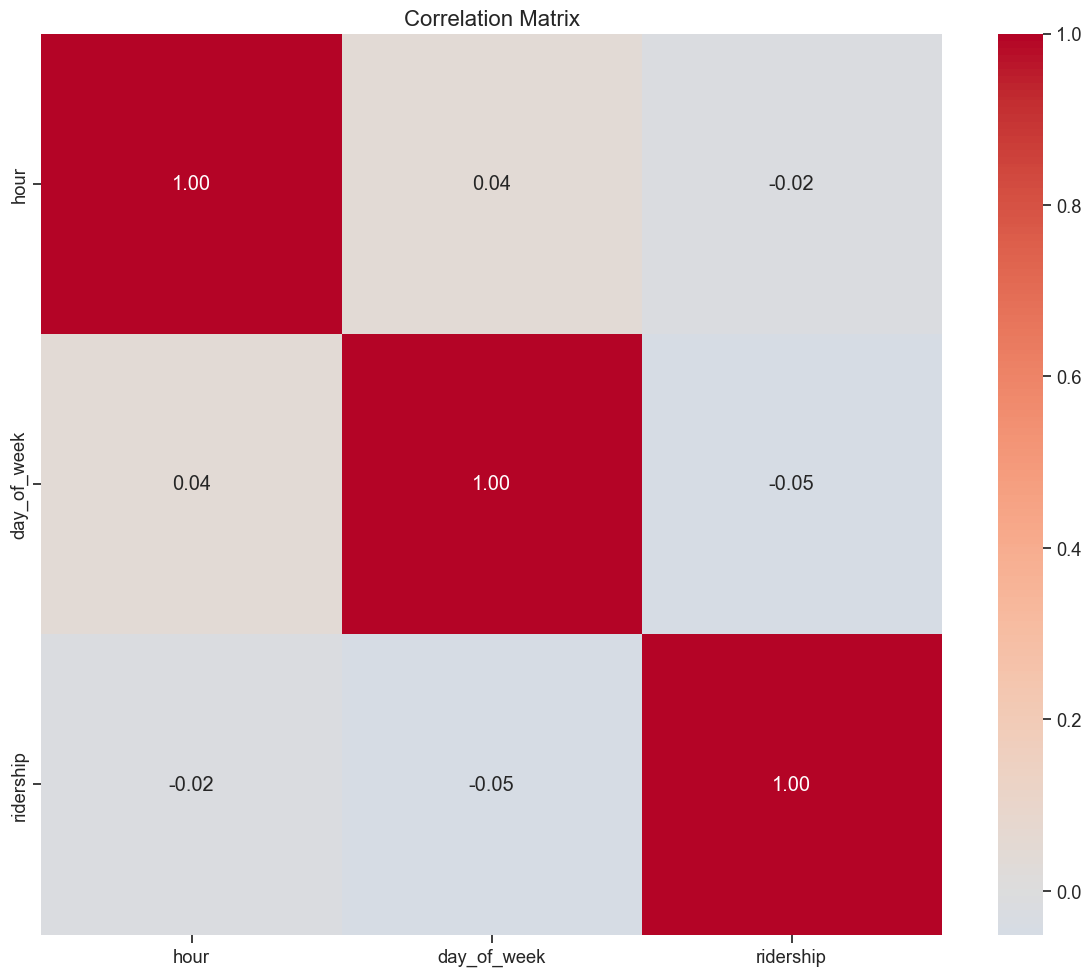

In [25]:
# Create correlation features
numeric_df = pd.get_dummies(df[['hour', 'day_of_week', 'ridership']])

# Calculate correlation
corr_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

## Key Findings and Next Steps

Based on our exploratory data analysis, here are the key findings:

1. **Temporal Patterns**: The ridership data shows distinct peak patterns with morning (7-9AM) and evening (5-7PM) rush hours having the highest passenger volumes. Weekdays (Monday-Friday) show significantly higher ridership compared to weekends, with Friday typically having the highest overall ridership. The day-hour heatmap reveals clear commuting patterns with ridership concentrated during business hours on weekdays.

2. **Station Popularity**: Major hub stations like KL Sentral, Kuala Lumpur, and Mid Valley show the highest passenger volumes as both origins and destinations. There's a clear hierarchy of stations with the top 10 stations accounting for a disproportionate share of total ridership. Some stations show asymmetric patterns - functioning primarily as origins in mornings and destinations in evenings, suggesting they are in residential or commercial areas respectively.

3. **Peak Hour Trends**: Morning peak (6-9AM) and evening peak (5-8PM) show different travel patterns. In the morning peak, residential areas dominate as origins while commercial centers are the top destinations. Evening peak shows the reverse pattern, with commercial areas as top origins and residential areas as destinations. This confirms the commuter nature of the Komuter service.

4. **Data Quality**: The dataset is complete with no missing values detected across all columns. The date coverage is continuous with no gaps in the time series. Ridership values follow an expected distribution with most trips having low passenger counts and a long tail of higher-volume routes. Some outliers exist with unusually high ridership counts that may represent special events or data anomalies that should be investigated further.

### Next Steps for Preprocessing:

1. Handle missing values and outliers if identified
2. Encode categorical features (origin and destination stations)
3. Create additional features such as:
   - Distance between stations
   - Trip duration estimates
   - Is_weekend flag
   - Is_peak_hour flag
4. Normalize/standardize features for modeling
5. Split data into training and test sets

### Potential Modeling Approaches:

1. **Time Series Forecasting**: Predict ridership trends over time
2. **Regression Models**: Predict ridership based on various factors
3. **Classification**: Classify peak vs. non-peak periods or high vs. low ridership routes
4. **Clustering**: Group stations based on ridership patterns
5. **Network Analysis**: Analyze the flow of passengers through the transit network